In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
train = pd.read_csv('/kaggle/input/mse-2-ai-201-b-ai-d/train.csv')
test = pd.read_csv('/kaggle/input/mse-2-ai-201-b-ai-d/test.csv')

In [14]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,NaN,NaN,483.3133,194.6325,0.9153,304.2065,0.9681,75075.0,0.7105,2.4832,0.6052,0.6294,0.0066,0.0027,0.3962,0.9838,Kirmizi_Pistachio
1,100409.0,1219.521,NaN,275.7984,0.8077,357.5538,0.9920,101215.0,0.7639,1.6961,0.8484,0.7644,NaN,0.0027,0.5842,0.9909,Siit_Pistachio
2,80569.0,NaN,498.0320,212.6353,0.9043,320.2868,0.9534,84508.0,0.6326,2.3422,0.5832,0.6431,0.0062,0.0026,0.4136,0.9687,NaN
3,58386.0,1088.683,423.7374,187.3131,0.8970,272.6525,0.9061,64440.0,0.6668,2.2622,0.6190,0.6434,0.0073,0.0032,0.4140,0.9366,NaN
4,84056.0,NaN,464.7390,237.5981,0.8594,327.1443,0.9427,89167.0,0.7534,1.9560,0.5506,0.7039,0.0055,0.0028,0.4955,NaN,Kirmizi_Pistachio


In [15]:
train.shape

(1824, 17)

In [16]:
test.shape

(645, 17)

In [17]:
train.isnull().sum()

AREA             155
PERIMETER        265
MAJOR_AXIS       225
MINOR_AXIS       205
ECCENTRICITY     110
EQDIASQ          110
SOLIDITY          95
CONVEX_AREA      233
EXTENT           193
ASPECT_RATIO     243
ROUNDNESS         94
COMPACTNESS      282
SHAPEFACTOR_1    237
SHAPEFACTOR_2    115
SHAPEFACTOR_3    118
SHAPEFACTOR_4    126
Class            136
dtype: int64

In [18]:
train.drop_duplicates(inplace=True)

In [19]:
for col in train.columns:
    if train[col].dtype == "object":
        train[col].fillna(train[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)

/tmp/ipykernel_47/1945692380.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/tmp/ipykernel_47/1945692380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [20]:
for col in test.columns:
    if test[col].dtype == "object":
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        test[col].fillna(test[col].median(), inplace=True)

/tmp/ipykernel_47/1794012449.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(test[col].median(), inplace=True)


In [21]:
import numpy as np
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols_outlier = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'CONVEX_AREA', 'ASPECT_RATIO', 'SOLIDITY', 'ROUNDNESS', 'COMPACTNESS']
train = remove_outliers_iqr(train, numeric_cols_outlier)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


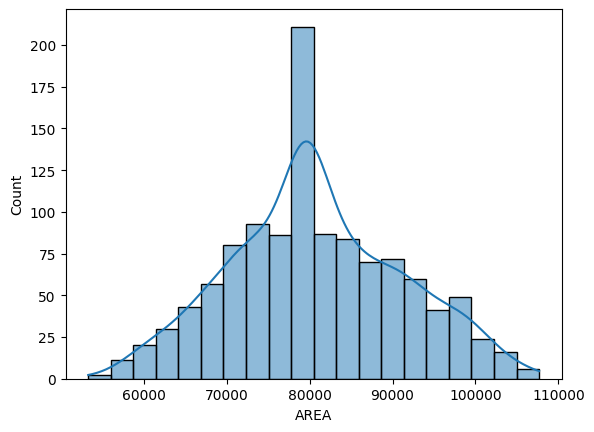

In [22]:
sns.histplot(train['AREA'], kde=True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


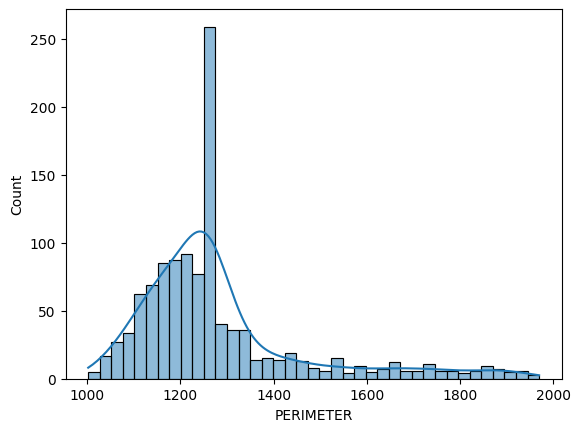

In [23]:
sns.histplot(train['PERIMETER'], kde=True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


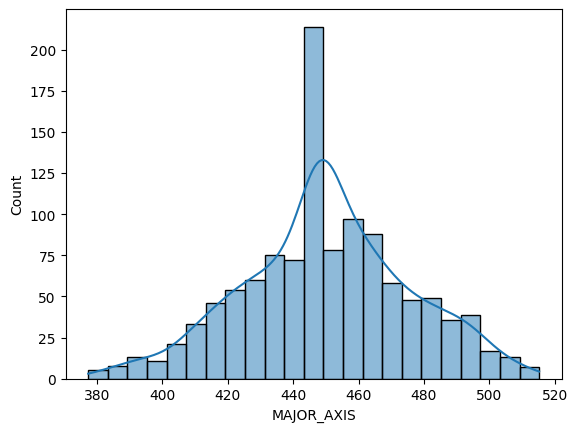

In [24]:
sns.histplot(train['MAJOR_AXIS'], kde=True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


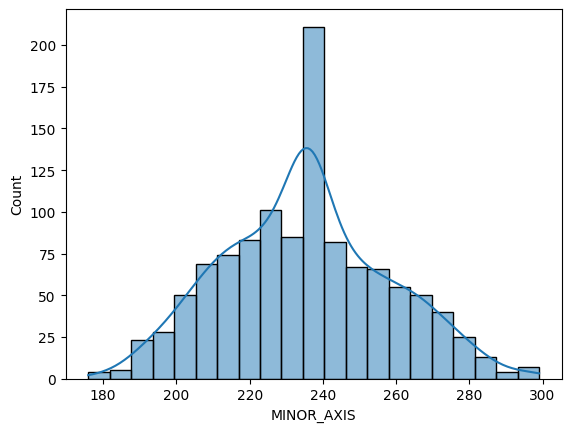

In [25]:
sns.histplot(train['MINOR_AXIS'], kde=True)
plt.show()

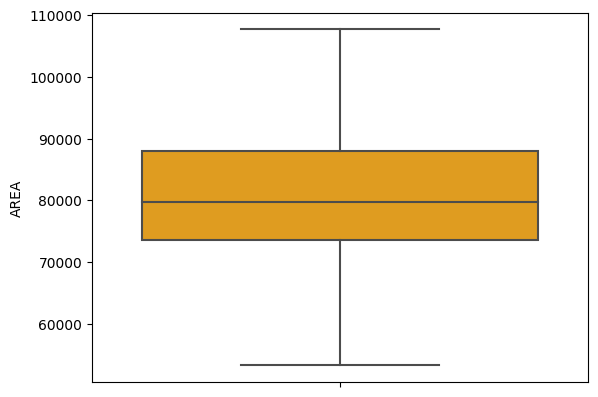

In [26]:
sns.boxplot(y=train['AREA'], color='orange')
plt.show()

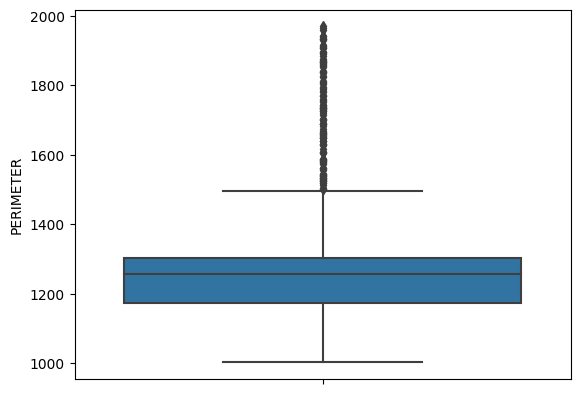

In [27]:
sns.boxplot(y=train['PERIMETER'])
plt.show()

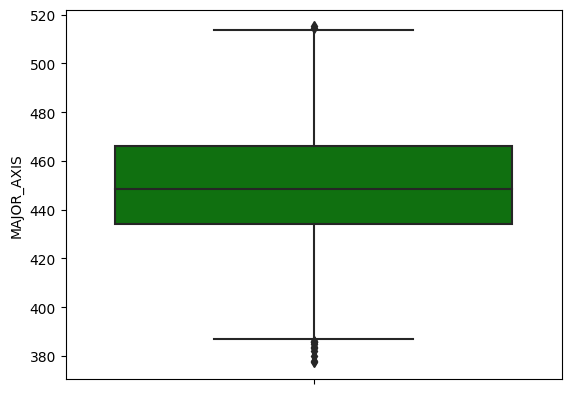

In [28]:
sns.boxplot(y=train['MAJOR_AXIS'], color='green')
plt.show()

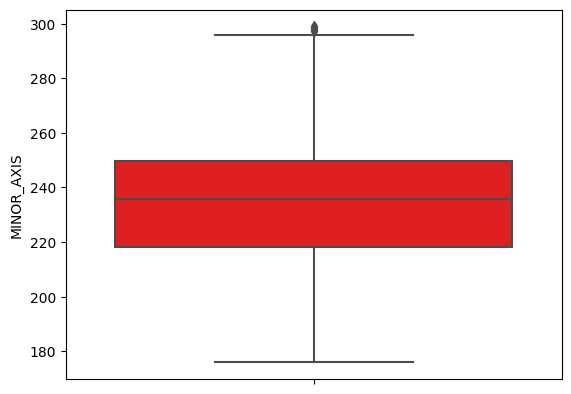

In [29]:
sns.boxplot(y=train['MINOR_AXIS'], color='red')
plt.show()

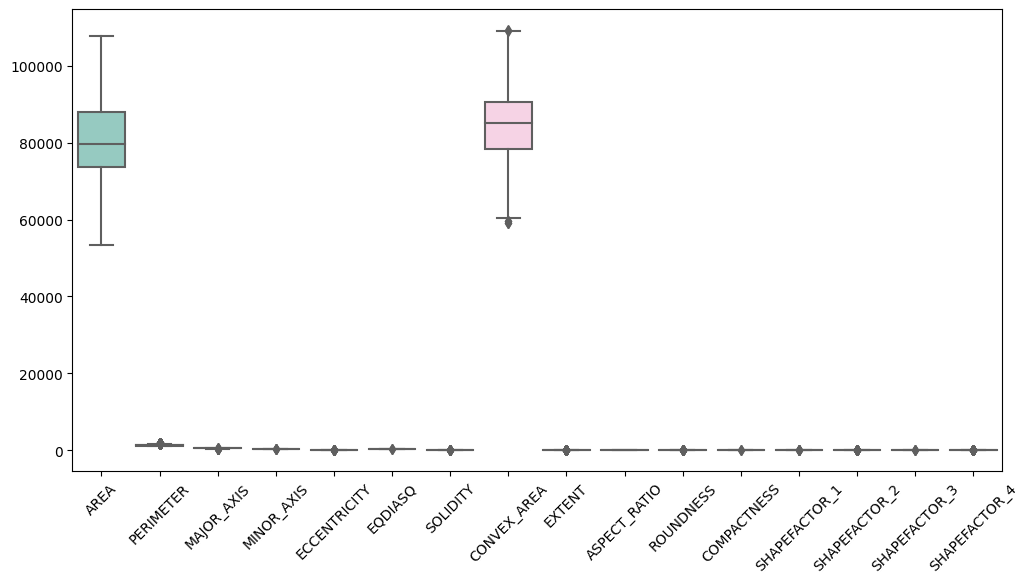

In [30]:
num_cols_all = train.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(12,6))
sns.boxplot(data=train[num_cols_all], palette='Set3')
plt.xticks(rotation=45)
plt.show()

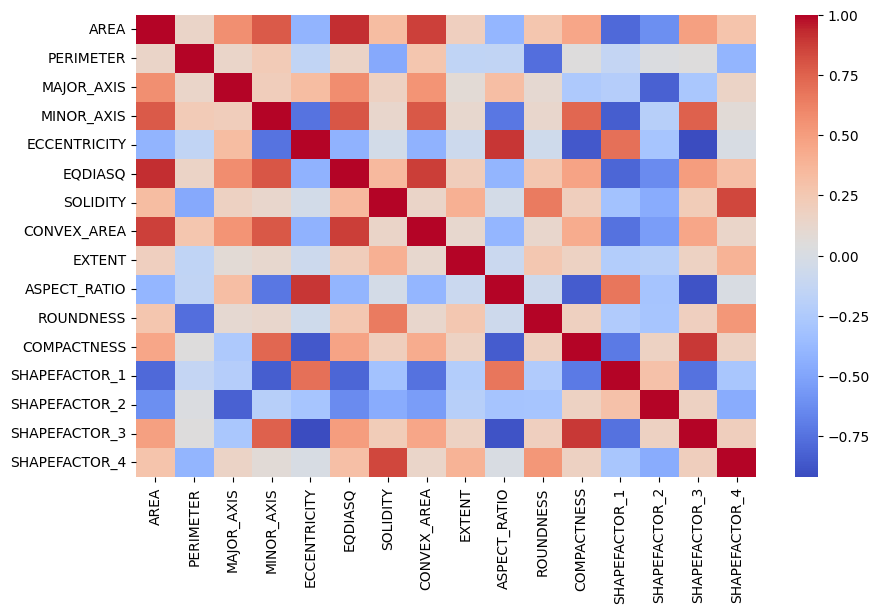

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(train.select_dtypes(include=['float64','int64']).corr(), cmap='coolwarm')
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in train.select_dtypes(include="object").columns:
    if col != "Class":
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])
        le_dict[col] = le

target_le = LabelEncoder()
train["Class"] = target_le.fit_transform(train["Class"])

In [33]:

from sklearn.preprocessing import StandardScaler

num_cols = train.select_dtypes(include=['float64','int64']).columns.drop("Class")
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [34]:
from sklearn.model_selection import train_test_split

X = train.drop("Class", axis=1)
y = train["Class"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = rf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8471615720524017


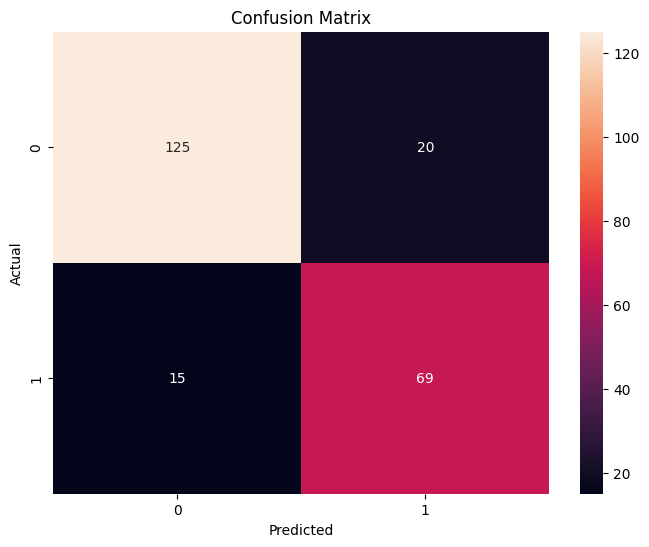

In [37]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators': [100,200,300],
    'max_depth': [5,10,20,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True,False]
}

In [39]:
rs = RandomizedSearchCV(
    rf,
    param_distributions=params,
    n_iter=20, cv=3,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42)

rs.fit(X_train, y_train)
best_model = rs.best_estimator_

In [40]:
test_fixed = test.drop("id", axis=1)
test_pred = best_model.predict(test_fixed)
test_pred_original = target_le.inverse_transform(test_pred)

In [41]:
submission = pd.DataFrame({"id": test["id"], "Class": test_pred_original})
submission.to_csv("submission.csv", index=False)
print("submission.csv saved")

submission.csv saved
